In [2]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube = False, class_sep = 20)

In [4]:
X, y

(array([[ 0.51123145, -0.11697552],
        [ 0.06316371, -0.73115232],
        [-0.0425064 , -0.7081059 ],
        [-3.2891569 , -2.01199214],
        [ 0.1111445 ,  1.63493163],
        [-2.53070306,  0.15599044],
        [-3.49036198,  1.07782053],
        [ 0.3976447 ,  0.80626713],
        [-0.24666899,  0.74859527],
        [-3.65803446,  0.75152794],
        [-3.47658131, -0.90114581],
        [-3.47815037, -0.1815243 ],
        [ 0.29004249, -2.98092432],
        [ 1.11761831,  1.20500136],
        [-3.52530398,  0.78302407],
        [ 0.69929128,  0.42968688],
        [ 0.17089733, -0.73229726],
        [-3.57785124, -0.83930476],
        [ 0.12965489,  0.83727062],
        [-3.46888717, -0.10255323],
        [-3.97487212,  0.65867001],
        [-3.76348686,  0.92649819],
        [-3.01519735,  0.10216193],
        [ 1.92241659,  0.46886454],
        [-2.91479578,  0.45432938],
        [ 0.9259563 ,  1.8613386 ],
        [-3.4859014 , -0.79255991],
        [-2.73978345, -1.000

In [5]:
import matplotlib.pyplot as plt


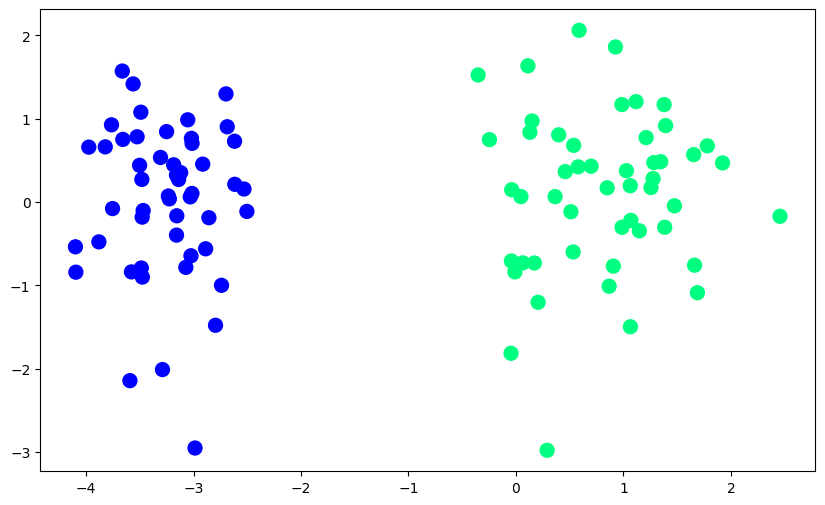

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s =100)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty=None, solver = 'sag')
lr.fit(X, y)

C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [10]:
lr.coef_

array([[4.78294718, 0.20623506]])

In [11]:
lr.intercept_

array([5.7530488])

In [13]:
m1 = -(lr.coef_[0][0])/lr.coef_[0][1]
b1 = -(lr.intercept_)/lr.coef_[0][1]

In [14]:
x_input = np.linspace(-3, 3, 100)
y_input = m1*x_input + b1

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [19]:
def gd(X, y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(3000):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr *(np.dot((y-y_hat), X)/ X.shape[0])

    return weights[1:], weights[0]

In [20]:
coef_, intercept_ = gd(X, y)

In [21]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [22]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

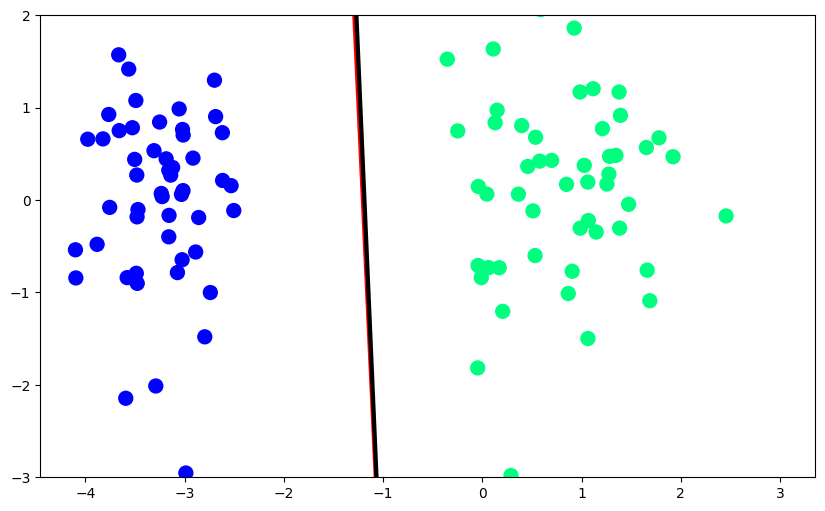

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.plot(x_input1, y_input1, color = 'black', linewidth = 3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'winter', s = 100)
plt.ylim(-3, 2)